In [1]:
# !pip install --upgrade pandas

In [2]:
import pandas as pd
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [3]:
# Read our data from csv file
data = pd.read_csv('data_perceptron.csv', header=None)
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [4]:
# Create dataset from Pandas dataframe
X = data.loc[:,0:1]
y = data.loc[:,2]

In [5]:
# Convert dataset to Numpy
X = X.to_numpy()
y = y.to_numpy()

In [6]:
# Helper functions to make a prediction
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [7]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [8]:
# This function runs the perceptron algorithm repeatedly on the dataset,
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max

    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step to update W & b
        W, b = perceptronStep(X, y, W, b, learn_rate)
        
        print(f"Training epoch: #{i+1}")
        print(f"Weight: {W}")
        print(f"bias: {b}")
        # Calculează și afișează acuratețea
        preds = np.array([prediction(X[j], W, b) for j in range(len(X))])
        accuracy = np.mean(preds == y)
        print(f"Epoch {i+1}: accuracy = {accuracy:.3f}%")

    final_preds = np.array([prediction(X[j], W, b) for j in range(len(X))])
    final_acc = np.mean(final_preds == y)
    print(f"Final accuracy: {final_acc:.2f}%")

    return W, b

In [9]:
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
model_train = trainPerceptronAlgorithm(X, y, 
                                 learn_rate=0.001, 
                                 num_epochs=30)
model_train

Training epoch: #1
Weight: [[0.34023612]
 [0.91576377]]
bias: 1.6819939418114105
Epoch 1: accuracy = 0.500%
Training epoch: #2
Weight: [[0.30593212]
 [0.88081323]]
bias: 1.631993941811416
Epoch 2: accuracy = 0.500%
Training epoch: #3
Weight: [[0.27162812]
 [0.84586269]]
bias: 1.5819939418114215
Epoch 3: accuracy = 0.500%
Training epoch: #4
Weight: [[0.23732412]
 [0.81091215]]
bias: 1.531993941811427
Epoch 4: accuracy = 0.500%
Training epoch: #5
Weight: [[0.20302012]
 [0.77596161]]
bias: 1.4819939418114325
Epoch 5: accuracy = 0.500%
Training epoch: #6
Weight: [[0.16871612]
 [0.74101107]]
bias: 1.431993941811438
Epoch 6: accuracy = 0.500%
Training epoch: #7
Weight: [[0.13441212]
 [0.70606053]]
bias: 1.3819939418114435
Epoch 7: accuracy = 0.500%
Training epoch: #8
Weight: [[0.10010812]
 [0.67110999]]
bias: 1.331993941811449
Epoch 8: accuracy = 0.500%
Training epoch: #9
Weight: [[0.06580412]
 [0.63615945]]
bias: 1.2819939418114545
Epoch 9: accuracy = 0.500%
Training epoch: #10
Weight: [[0.

(array([[-0.56853206],
        [-0.02032655]]),
 0.3459939418114849)

In [10]:
# Make a prediction from the model training
final_model = model_train
W, b = final_model
# print("final model = ", final_model)

print(f"weight = {W.flatten()}")
print(f"bias = {b}")

#Print Final equation of the perceptron:
W_flat = W.flatten()    # transformă vectorul coloană într‑un vector 1D
w0 = round(W_flat[0], 2)
w1 = round(W_flat[1], 2)
b_r = round(b, 2)
ecuatie = f"{w0} * x1 + {w1} * x2 + {b_r} = 0"
print("Ecuația finală a perceptronului:", ecuatie)


preds = np.array([prediction(X[i], W, b) for i in range(len(X))])
final_accuracy = np.mean(preds == y)
print(f"Acuratețe finală: {final_accuracy:.2f}%")



weight = [-0.56853206 -0.02032655]
bias = 0.3459939418114849
Ecuația finală a perceptronului: -0.57 * x1 + -0.02 * x2 + 0.35 = 0
Acuratețe finală: 0.89%


In [12]:
prediction(X=[-1, 0.5], W=W, b=b)

1

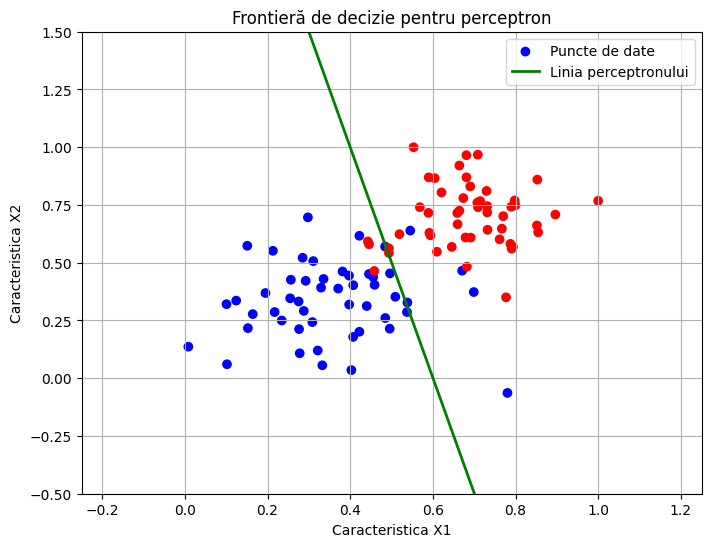

In [ ]:
# Vizualizare grafică a liniei perceptronului
import matplotlib.pyplot as plt

# Asigură-te că variabilele weight și bias sunt definite (din antrenarea anterioară)
# Dacă weight este un vector coloană, îl aplatizăm pentru ușurință
W_flat = weight.flatten() if hasattr(weight, 'flatten') else weight

# Calculăm valori x și corespunzător y pentru linia decizională
x_values = [min(X[:, 0]) - 1, max(X[:, 0]) + 1]
y_values = [-(bias + W_flat[0] * x) / W_flat[1] for x in x_values]

# Alegem culori diferite pentru fiecare clasă
colors = ['red' if label == 0 else 'blue' for label in y]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, label='Puncte de date')
plt.plot(x_values, y_values, color='green', linewidth=2, label='Linia perceptronului')
plt.xlabel('Caracteristica X1')
plt.ylabel('Caracteristica X2')
plt.title('Frontieră de decizie pentru perceptron')
plt.legend()
plt.grid(True)
plt.xlim(-0.25, 1.25)
plt.ylim(-0.5, 1.5)
plt.show()
